This jupiter notebook contains individual analysis of the dataset which is provided by Sberautobank company

In [12]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import shapefile as shp

import pycountry

df_sessions = pd.read_csv(filepath_or_buffer = './data/ga_sessions.csv')
df = pd.read_csv(filepath_or_buffer = "./data/ga_hits.csv")
total_dataframe = pd.merge(left = df, right = df_sessions, on = "session_id")

C:\Users\User\AppData\Local\Temp\ipykernel_21728\3090103523.py:9: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sessions = pd.read_csv(filepath_or_buffer = './data/ga_sessions.csv')


In [13]:
#Generating the abbreviations for countries in the dataset
def alpha3code(column):
    CODE = []
    for country in column :
        try :
            code = pycountry.countries.get(name = country).alpha_3 #Three letter code
            CODE.append(code)
        except :
            CODE.append(None)
    return CODE 

countries = alpha3code([total_dataframe['geo_country'][5]])
countries

[None]

In [14]:
total_dataframe['geo_country'][2494276]

'Russia'

In [15]:
alpha3code(['Afghanistan'])

['AFG']

In [16]:
total_dataframe.groupby('geo_country')['hit_time'].mean().index

Index(['(not set)', 'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Aruba',
       ...
       'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay',
       'Uzbekistan', 'Venezuela', 'Vietnam', 'Wallis & Futuna', 'Yemen',
       'Zimbabwe'],
      dtype='object', name='geo_country', length=159)

In [17]:
total_dataframe.drop(columns = ['event_value', 'device_model'], inplace = True)
total_dataframe.dropna(inplace = True)

In [18]:
total_dataframe.shape

(42706, 26)

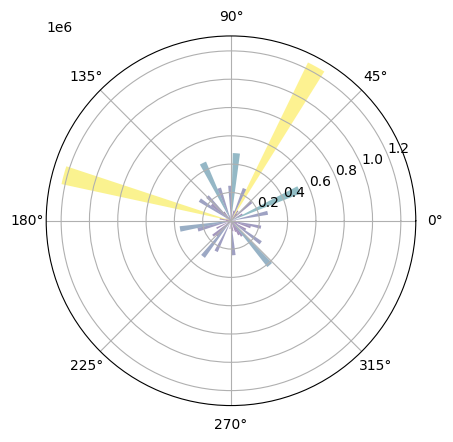

"\nplt.figure(figsize = (10, 8))\nplt.pie(x = x, labels = y, autopct='%1.1f%%')\nplt.show()\n"

In [24]:
x = total_dataframe.groupby('geo_country')['hit_time'].mean().values
y = total_dataframe.groupby('geo_country')['hit_time'].mean().index

N= len(y)
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False) 
radii = x
width = np.pi * 2 / N
colors = plt.cm.viridis(radii / np.max(radii))

ax = plt.subplot(projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()
"""
plt.figure(figsize = (10, 8))
plt.pie(x = x, labels = y, autopct='%1.1f%%')
plt.show()
"""

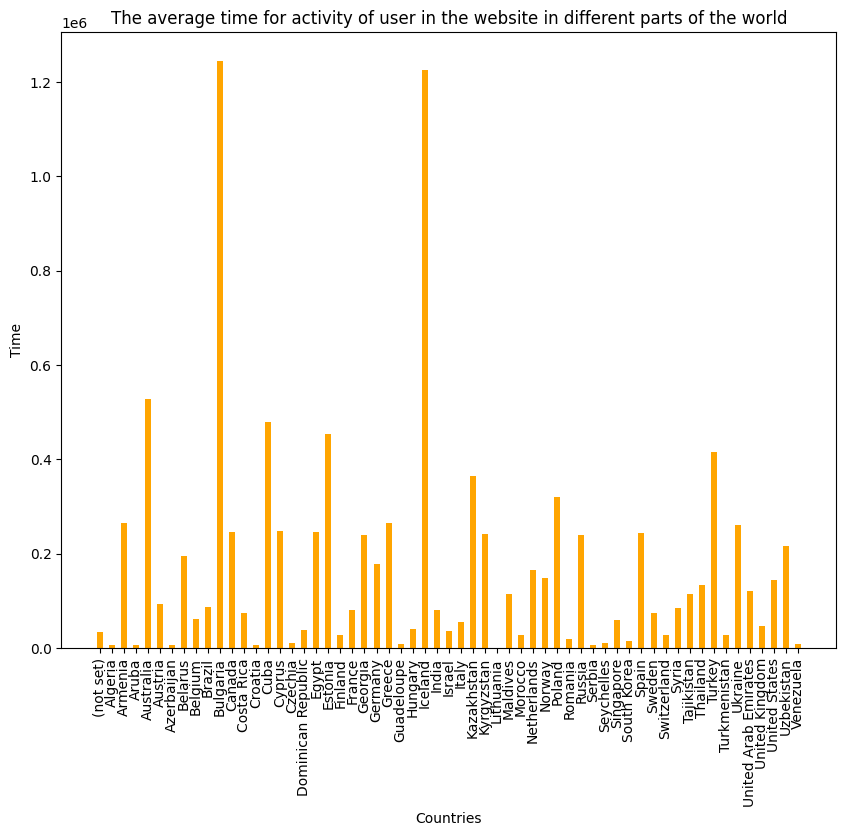

In [29]:
plt.figure(figsize = (10, 8))
plt.title(label = "The average time for activity of user in the website in different parts of the world")
plt.bar(height = x, x = y, color = 'Orange', width = 0.5)
plt.xticks(rotation = 90)
plt.xlabel(xlabel = 'Countries')
plt.ylabel(ylabel = 'Time')
plt.show()

In [ ]:
x

Index([], dtype='object', name='geo_country')

Information about z_score from kaggle.com

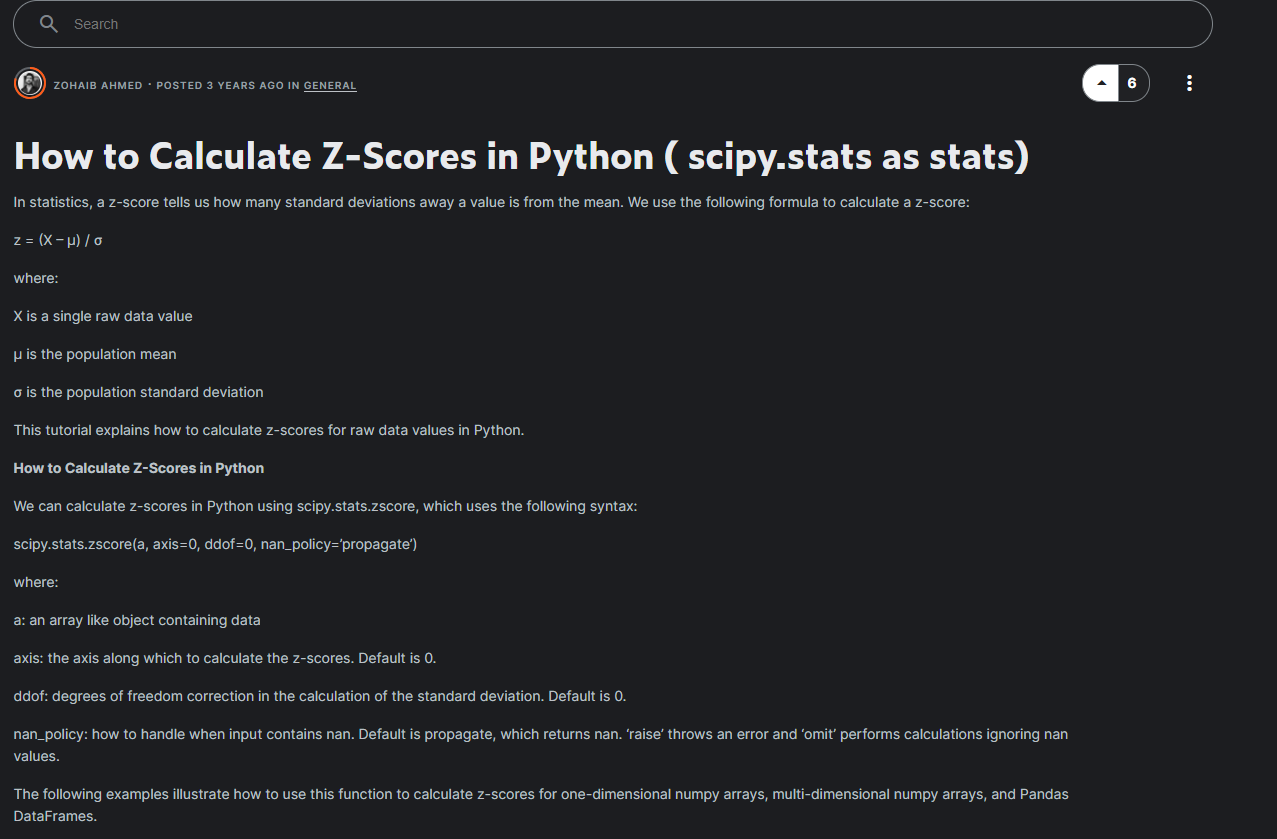

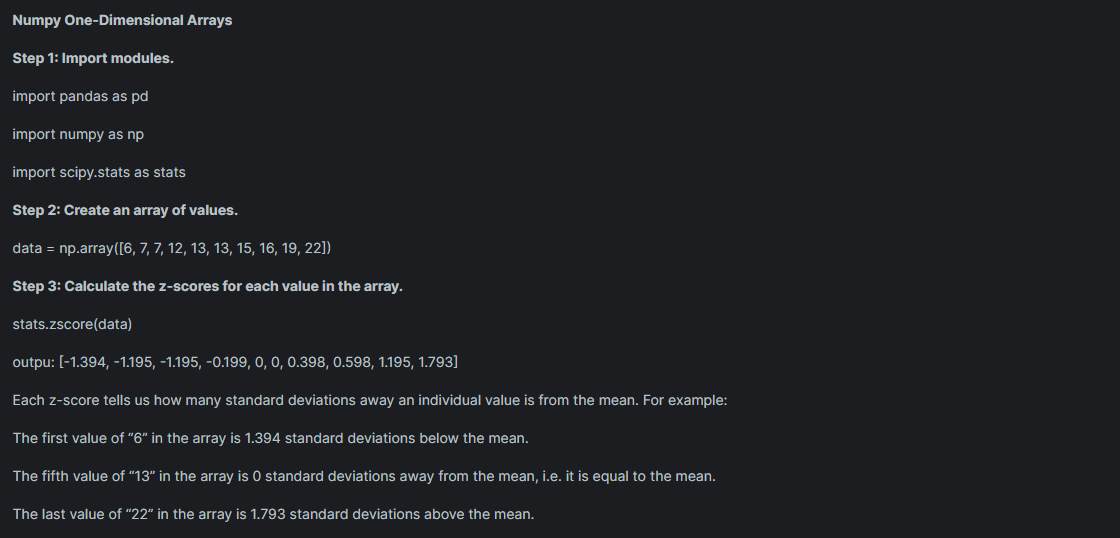

CHATGPT

To determine the p-value for a given Z-score in a two-tailed test, you follow these steps:

1. **Find the cumulative probability for the Z-score** using the standard normal distribution.
2. **Determine the p-value** by considering both tails of the distribution.

Given \(Z = -1.09\), you can use the cumulative distribution function (CDF) of the standard normal distribution to find the cumulative probability.

### Steps to Calculate the p-value:

1. **Find the cumulative probability for \(Z = -1.09\)**:
   - The CDF of the standard normal distribution gives the probability that a standard normal random variable is less than or equal to a given value.
   - For a Z-score of -1.09, you find \( P(Z \leq -1.09) \).

2. **Use the symmetry of the standard normal distribution**:
   - Because the standard normal distribution is symmetric about 0, \( P(Z \leq -1.09) \) is the same as \( P(Z \geq 1.09) \).

3. **Determine the two-tailed p-value**:
   - In a two-tailed test, you need to consider the probabilities in both tails.
   - The total p-value is \( P(Z \leq -1.09) + P(Z \geq 1.09) \).

### Calculation Using Python:

You can calculate this using Python's `scipy.stats` module:

```python
from scipy.stats import norm

# Given Z-score
z_score = -1.09

# Calculate the cumulative probability for the given Z-score
p_left_tail = norm.cdf(z_score)

# For a two-tailed test, multiply by 2
p_value = 2 * p_left_tail

print(f"p-value: {p_value}")
```

### Detailed Calculation:

1. **Find the cumulative probability for \( Z = -1.09 \)**:
   - Using a Z-table or `scipy.stats.norm.cdf`:
     \[
     P(Z \leq -1.09) \approx 0.1379
     \]

2. **Calculate the two-tailed p-value**:
   \[
   \text{p-value} = 2 \times P(Z \leq -1.09) = 2 \times 0.1379 \approx 0.2758
   \]

Thus, the two-tailed p-value for \( Z = -1.09 \) is approximately 0.2758.

This process shows that the p-value calculation involves finding the cumulative probability for the given Z-score and then adjusting for a two-tailed test by considering the symmetry of the normal distribution.